In [1]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV



In [2]:
import sys
sys.path.insert(0, 'C:\\Users\jedra\\Uni\AI-Master\Multi-objective-optimization\\fake-stock-predictions-challenge\src')

from helpers.data_loader import load_data, to_dataframe
from fortune_tellers import get_preds_dataframes, plot_predicitons_with_train_data


data = load_data("../../res/assets_bundles/Bundle3")
print(list(data.keys()))
print(len(data['ABCDE']))

['ABCDE', 'Apples', 'BetterTechnology', 'BetterTomorrow', 'CPU-XYZ', 'Electronics123', 'EnviroLike', 'Fuel4', 'Lasers', 'MarsProject', 'Moneymakers', 'PearPear', 'Photons', 'PositiveCorrelation', 'RoboticsX', 'SafeAndCare', 'SpaceNow', 'SuperFuture', 'WaterForce', 'WorldNow']
301


In [3]:
import matplotlib.pyplot as plt

def plot_gp(ax, X_test, y_pred, sigma, x_train=None, y_train=None, title='Prediction'):
    # ax.errorbar(X_test, y_pred, yerr=sigma, fmt='r.', markersize=10, label='Prediction', ecolor='y')
    if y_test is not None:
        ax.fill_between(X_test.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.1, color='r')
    ax.plot(X_test, y_pred, 'r-', markersize=10, label='Prediction')
    ax.plot(X_test, y_test, 'b-', label='Actual')
    if x_train is not None:
        ax.plot(x_train, y_train, 'g-', markersize=10, label='Training')
    ax.legend()
    ax.set_title(title)

In [4]:
def plot_gp(ax, X_test, y_pred, X_train=None, y_train=None, y_test=None, title='Prediction'):
    if y_test is not None:
        ax.plot(X_test.flatten(), y_test, 'b-', label='Actual')
    ax.plot(X_test, y_pred, 'r-', markersize=10, label='Prediction')
    if X_train is not None:
        ax.plot(X_train, y_train, 'g-', markersize=10, label='Training')
    ax.legend()
    ax.set_title(title)

In [5]:
periodic_kernel = kernels.ConstantKernel(1.0) * kernels.ExpSineSquared(length_scale=1, periodicity=100.0)
linear_kernel = kernels.ConstantKernel(1.0) * kernels.RBF(length_scale=1.0)
white_kernel = kernels.WhiteKernel(noise_level=1e-5)


kernel_ = [
    periodic_kernel + linear_kernel + white_kernel,
]

# Gaussian Process Regressor

C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  w

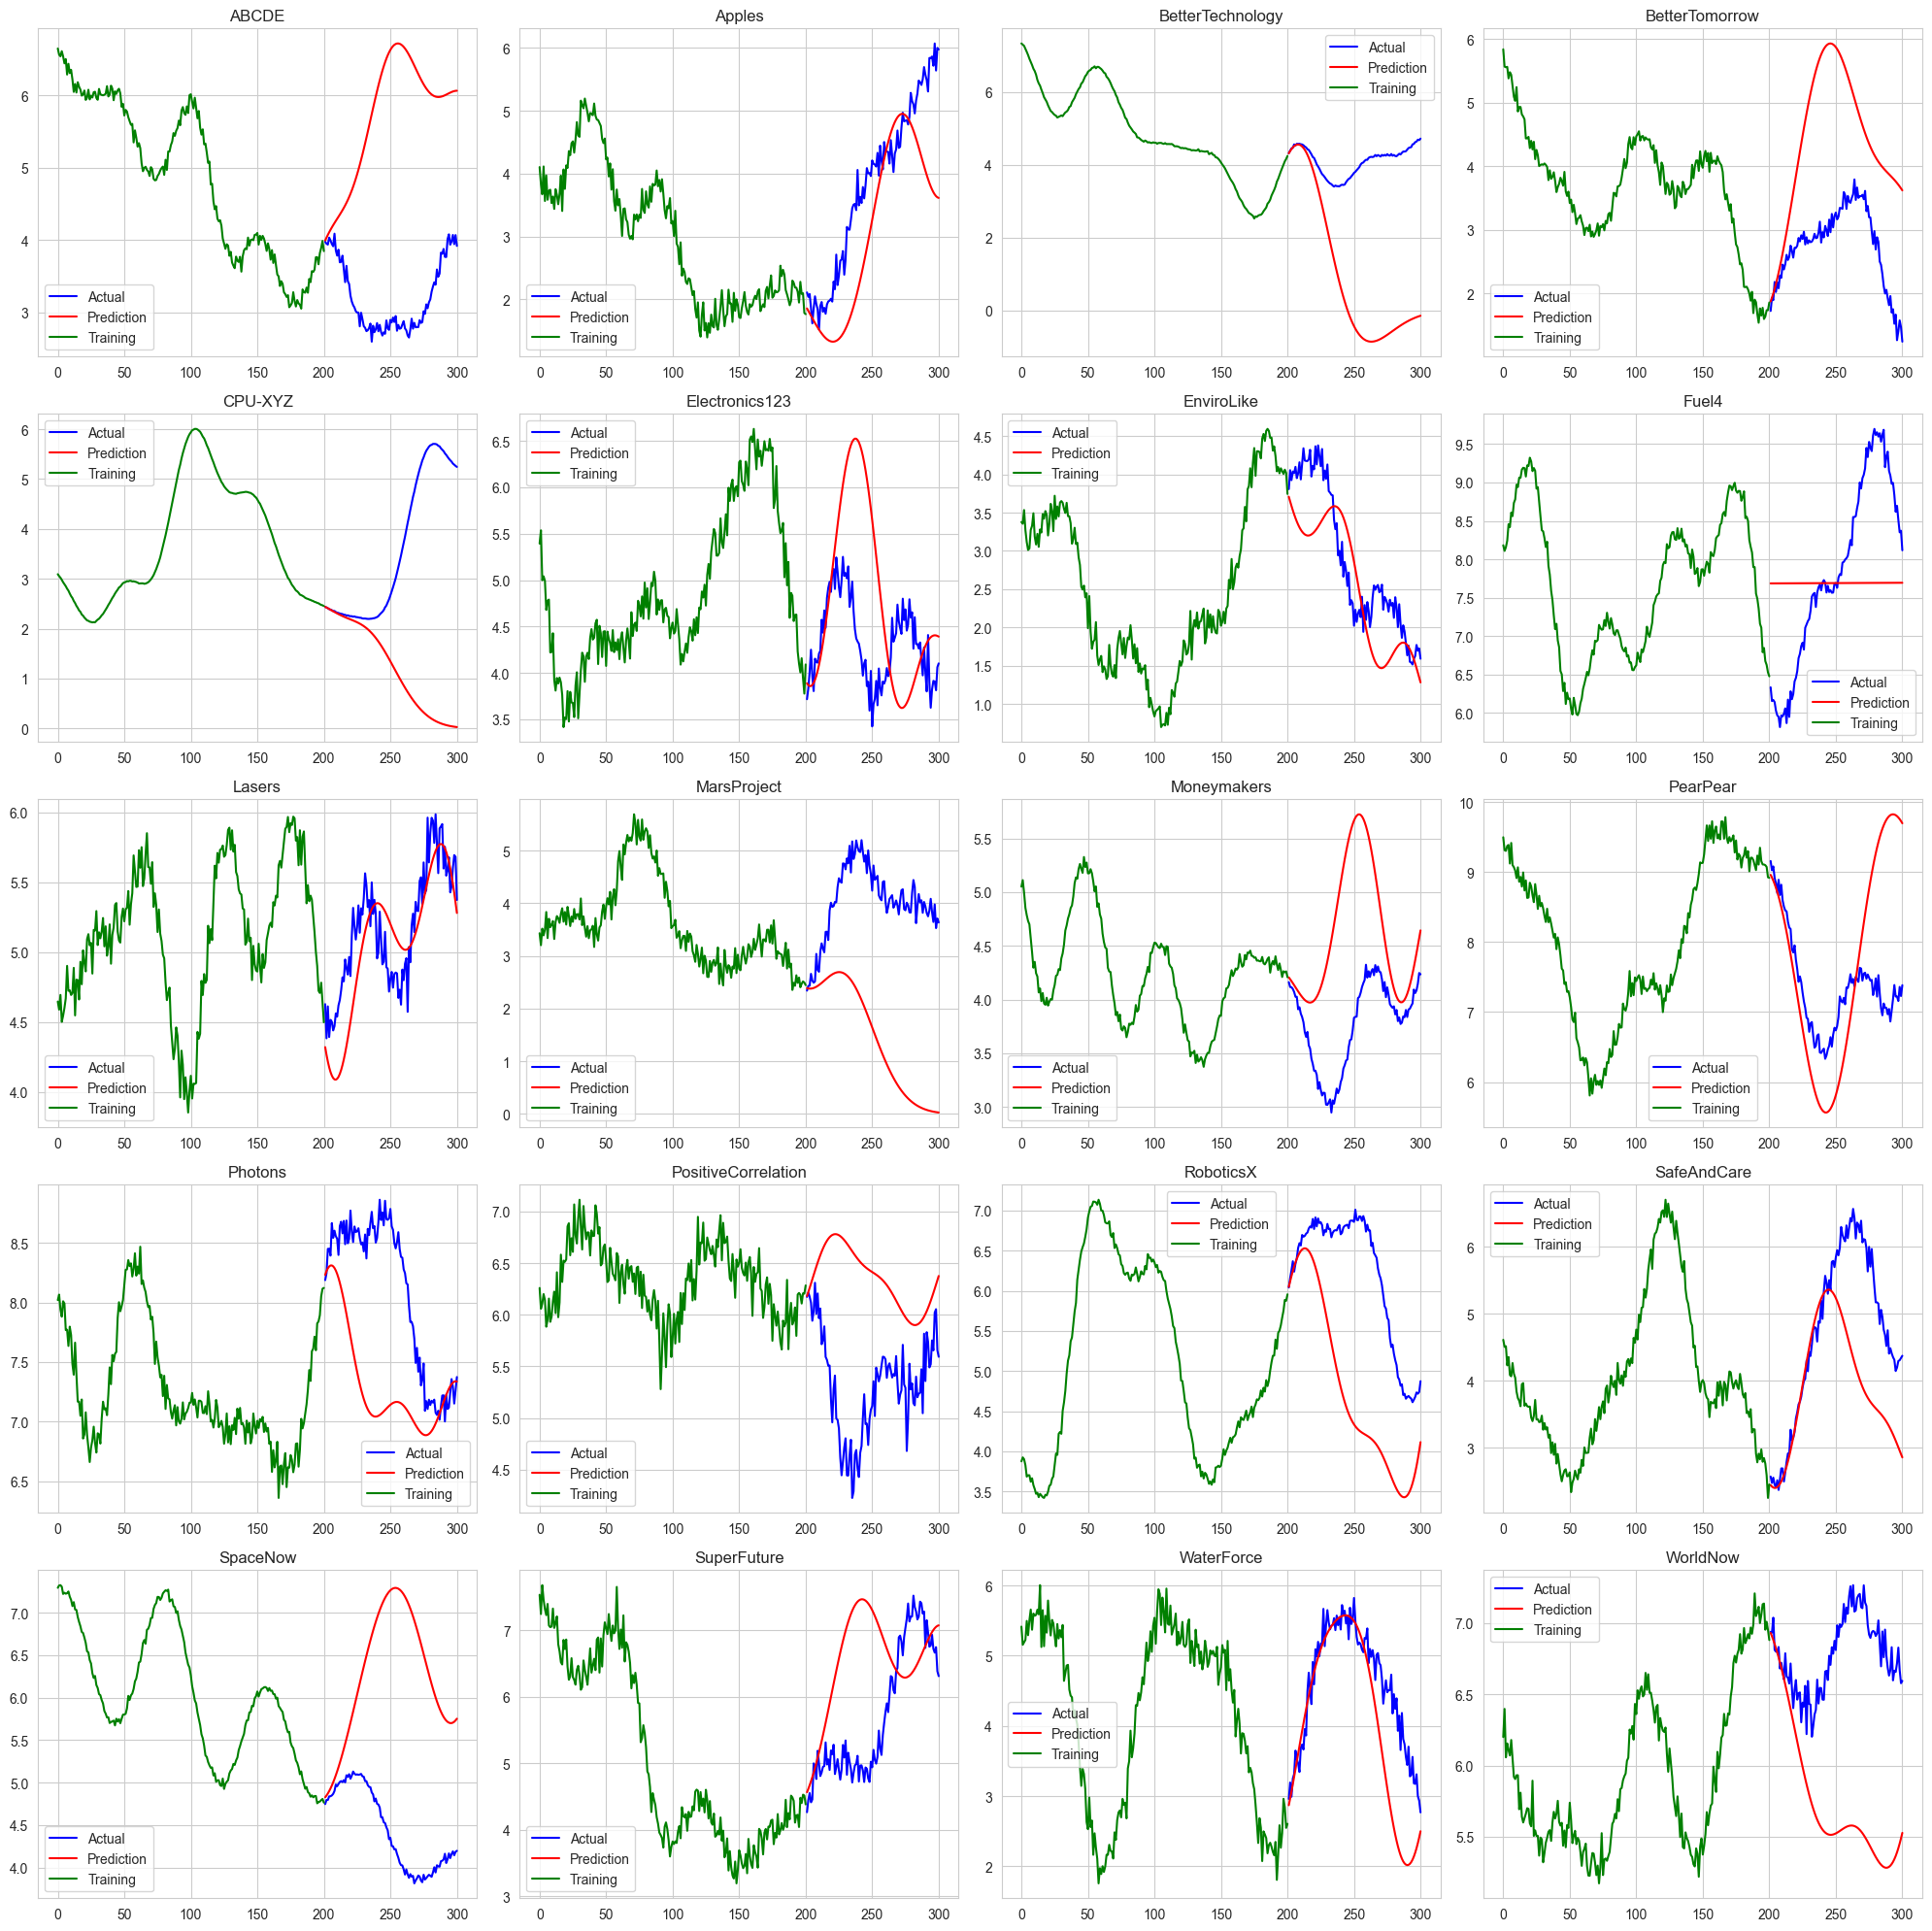

In [7]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV

train_size = 202
test_size = 100

fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i, company in enumerate(data.keys()):
    X_train = np.array([time for time, price in data[company][:train_size]])
    X_train = X_train.reshape(-1, 1)
    y_train = np.array([price for time, price in data[company][:train_size]])

    X_test = np.array([time for time, price in data[company][train_size:train_size+test_size]])
    X_test = X_test.reshape(-1, 1)
    y_test = np.array([price for time, price in data[company][train_size:train_size+test_size]])

    # Define the kernel components
    periodic_kernel = ConstantKernel(1.0) * ExpSineSquared(length_scale=1.0, periodicity=1.0)
    linear_kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)

    # Combine the kernels
    kernel = periodic_kernel + linear_kernel

    # Define parameter grid for optimization
    param_grid = {
       "kernel__k2__k2__length_scale": (1e-8, 1e6),  # decreased lower bound for length scale of the RBF kernel
    }

    # Initialize Gaussian Process Regressor
    gp = GaussianProcessRegressor(kernel=kernel)

    # Define the search strategy
    cv = RepeatedKFold(n_splits=5, n_repeats=3)  # Cross-validation strategy
    grid_search = GridSearchCV(gp, param_grid, cv=cv, n_jobs=-1)

    # Fit the GP model with hyperparameter optimization
    grid_search.fit(X_train, y_train)

    # Use the best hyperparameters to initialize the model
    best_gp = grid_search.best_estimator_

    # Predict using the model with optimized hyperparameters
    y_pred, sigma = best_gp.predict(X_test, return_std=True)

    # Plot the results
    plot_gp(axs[i//4, i%4], X_test, y_pred, X_train, y_train, y_test, title=company)

plt.tight_layout()
plt.show()

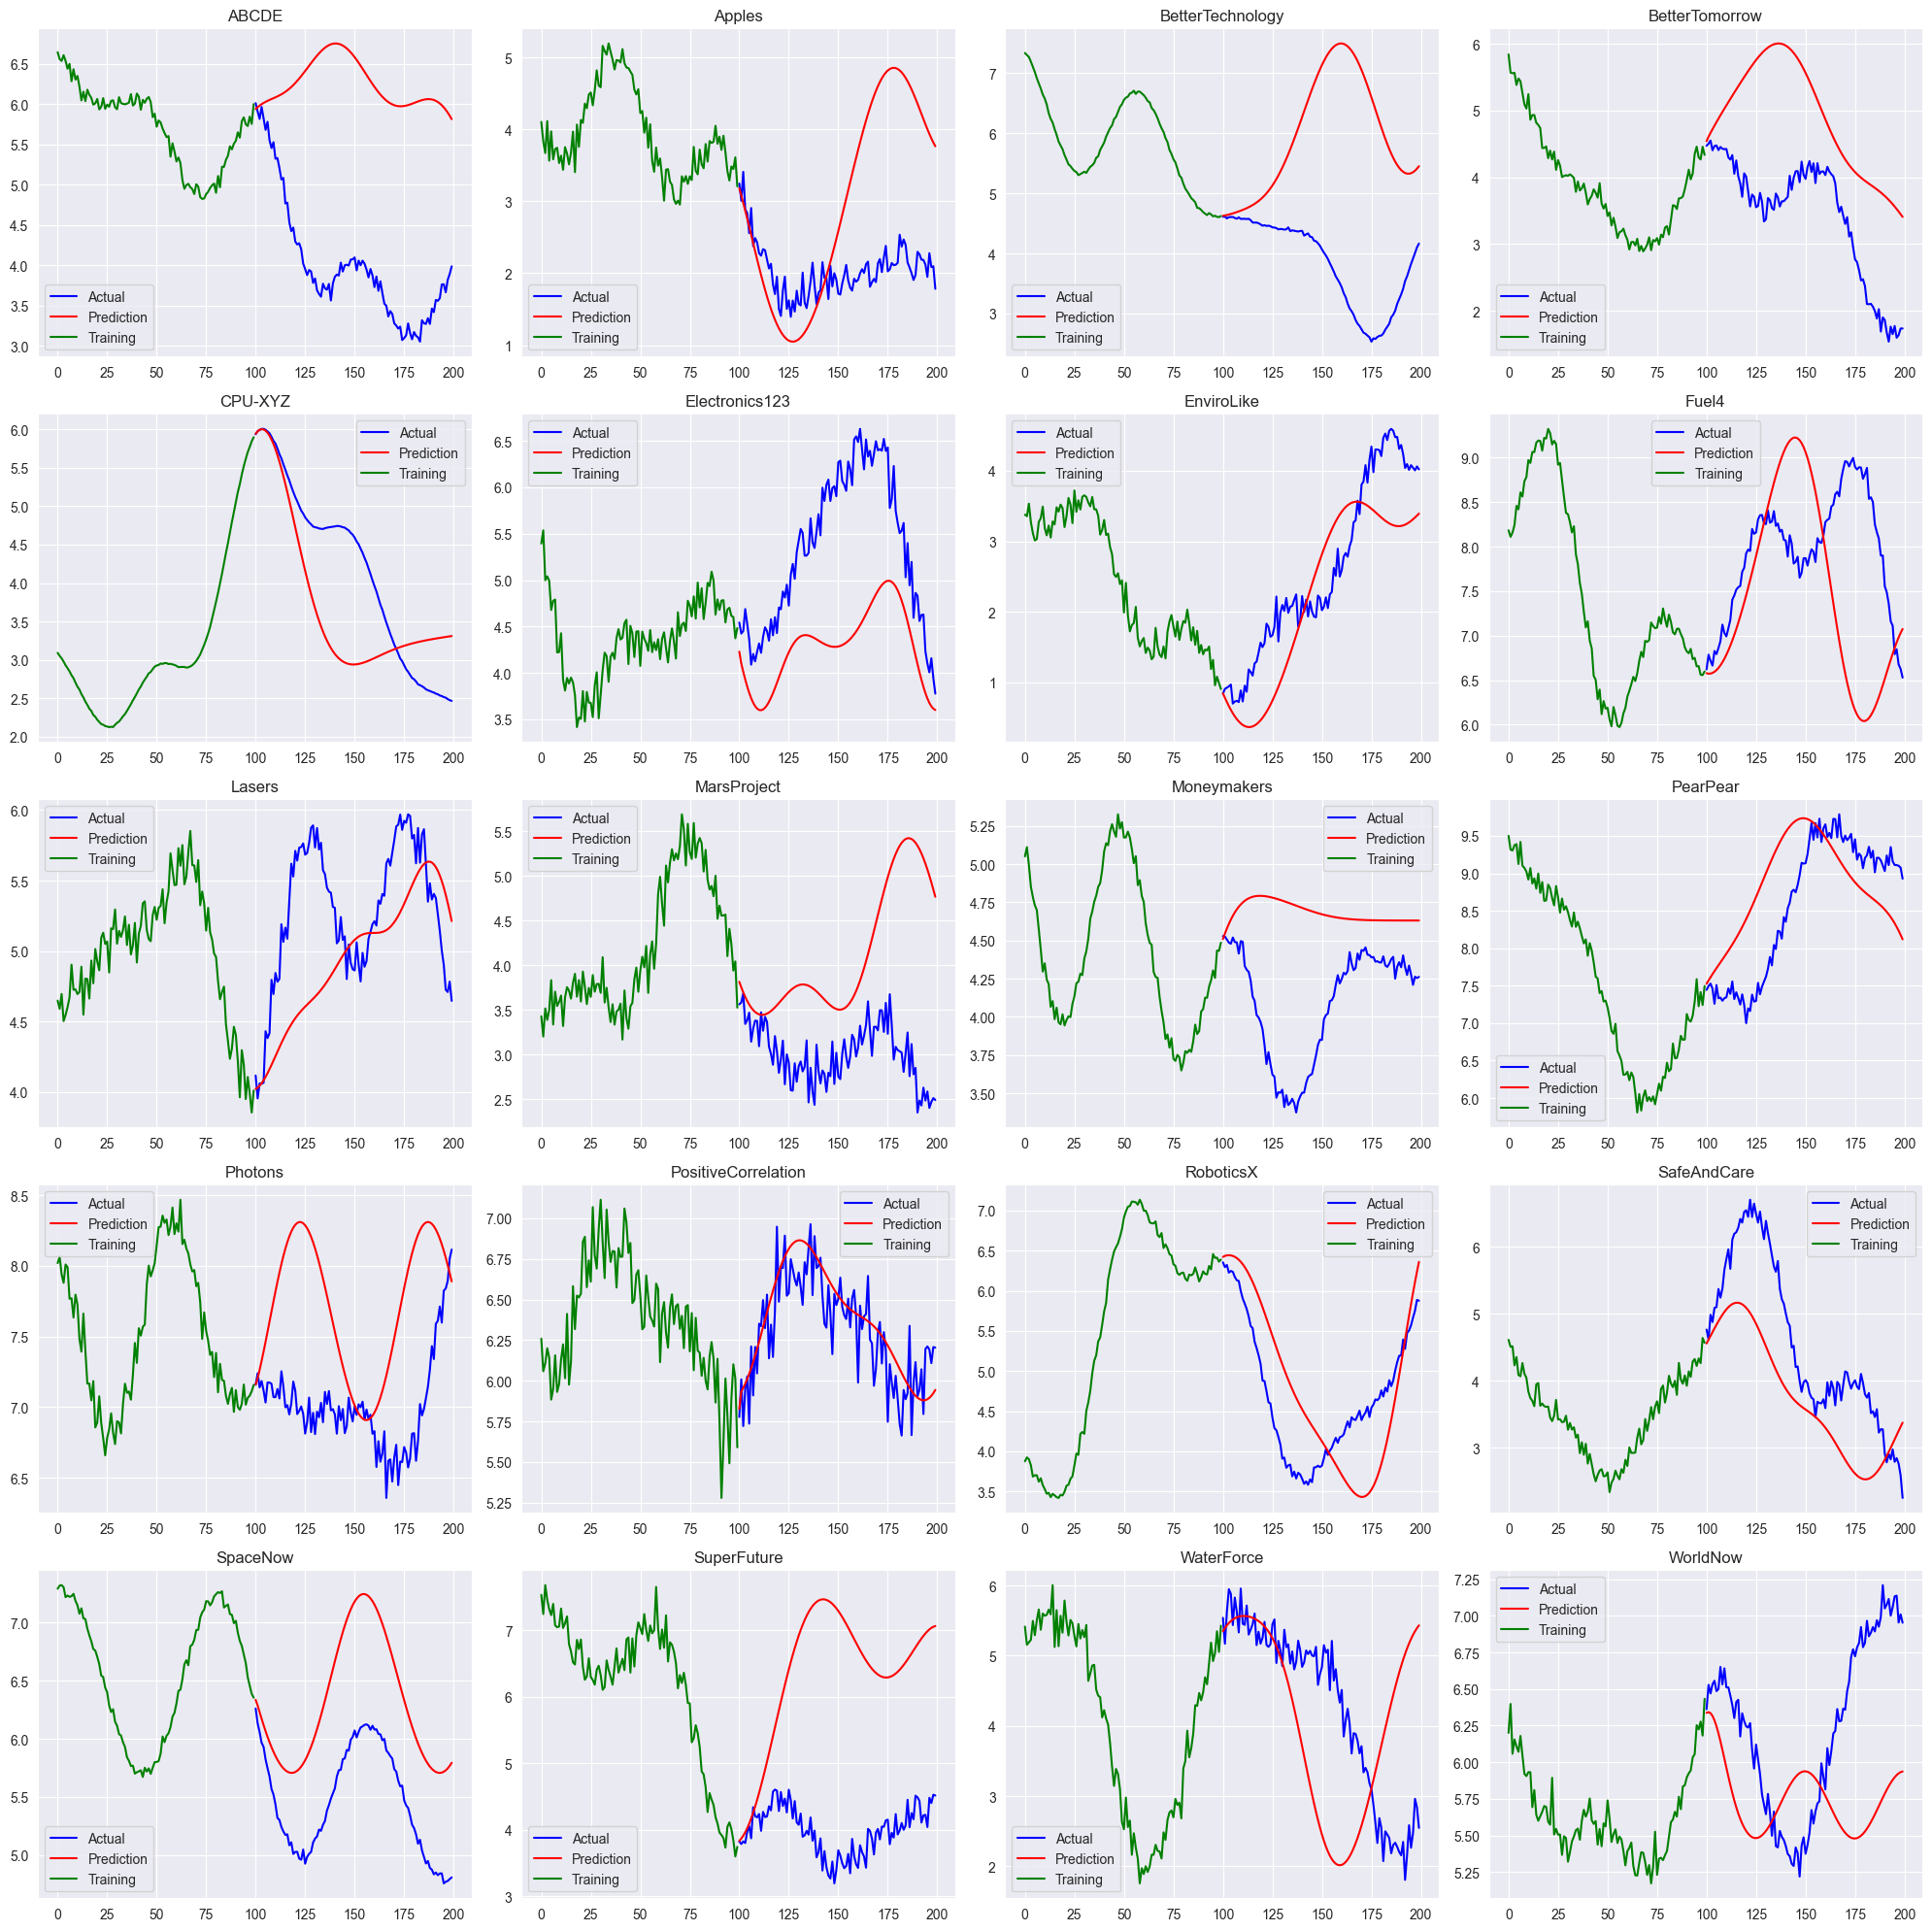

In [41]:
train_size = 200
test_size = 100

fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for i, company in enumerate(data.keys()):
    X_train = np.array([time for time, price in data[company][:train_size]])
    X_train = X_train.reshape(-1, 1)
    y_train = np.array([price for time, price in data[company][:train_size]])

    X_test = np.array([time for time, price in data[company][train_size:train_size+test_size]])
    X_test = X_test.reshape(-1, 1)
    y_test = np.array([price for time, price in data[company][train_size:train_size+test_size]])

    gp = GaussianProcessRegressor(kernel=kernel_[0])
    gp.fit(X_train, y_train)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    plot_gp(axs[i//4, i%4], X_test, y_pred, X_train, y_train, y_test, title=company)

plt.tight_layout()
plt.show()

C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may fin

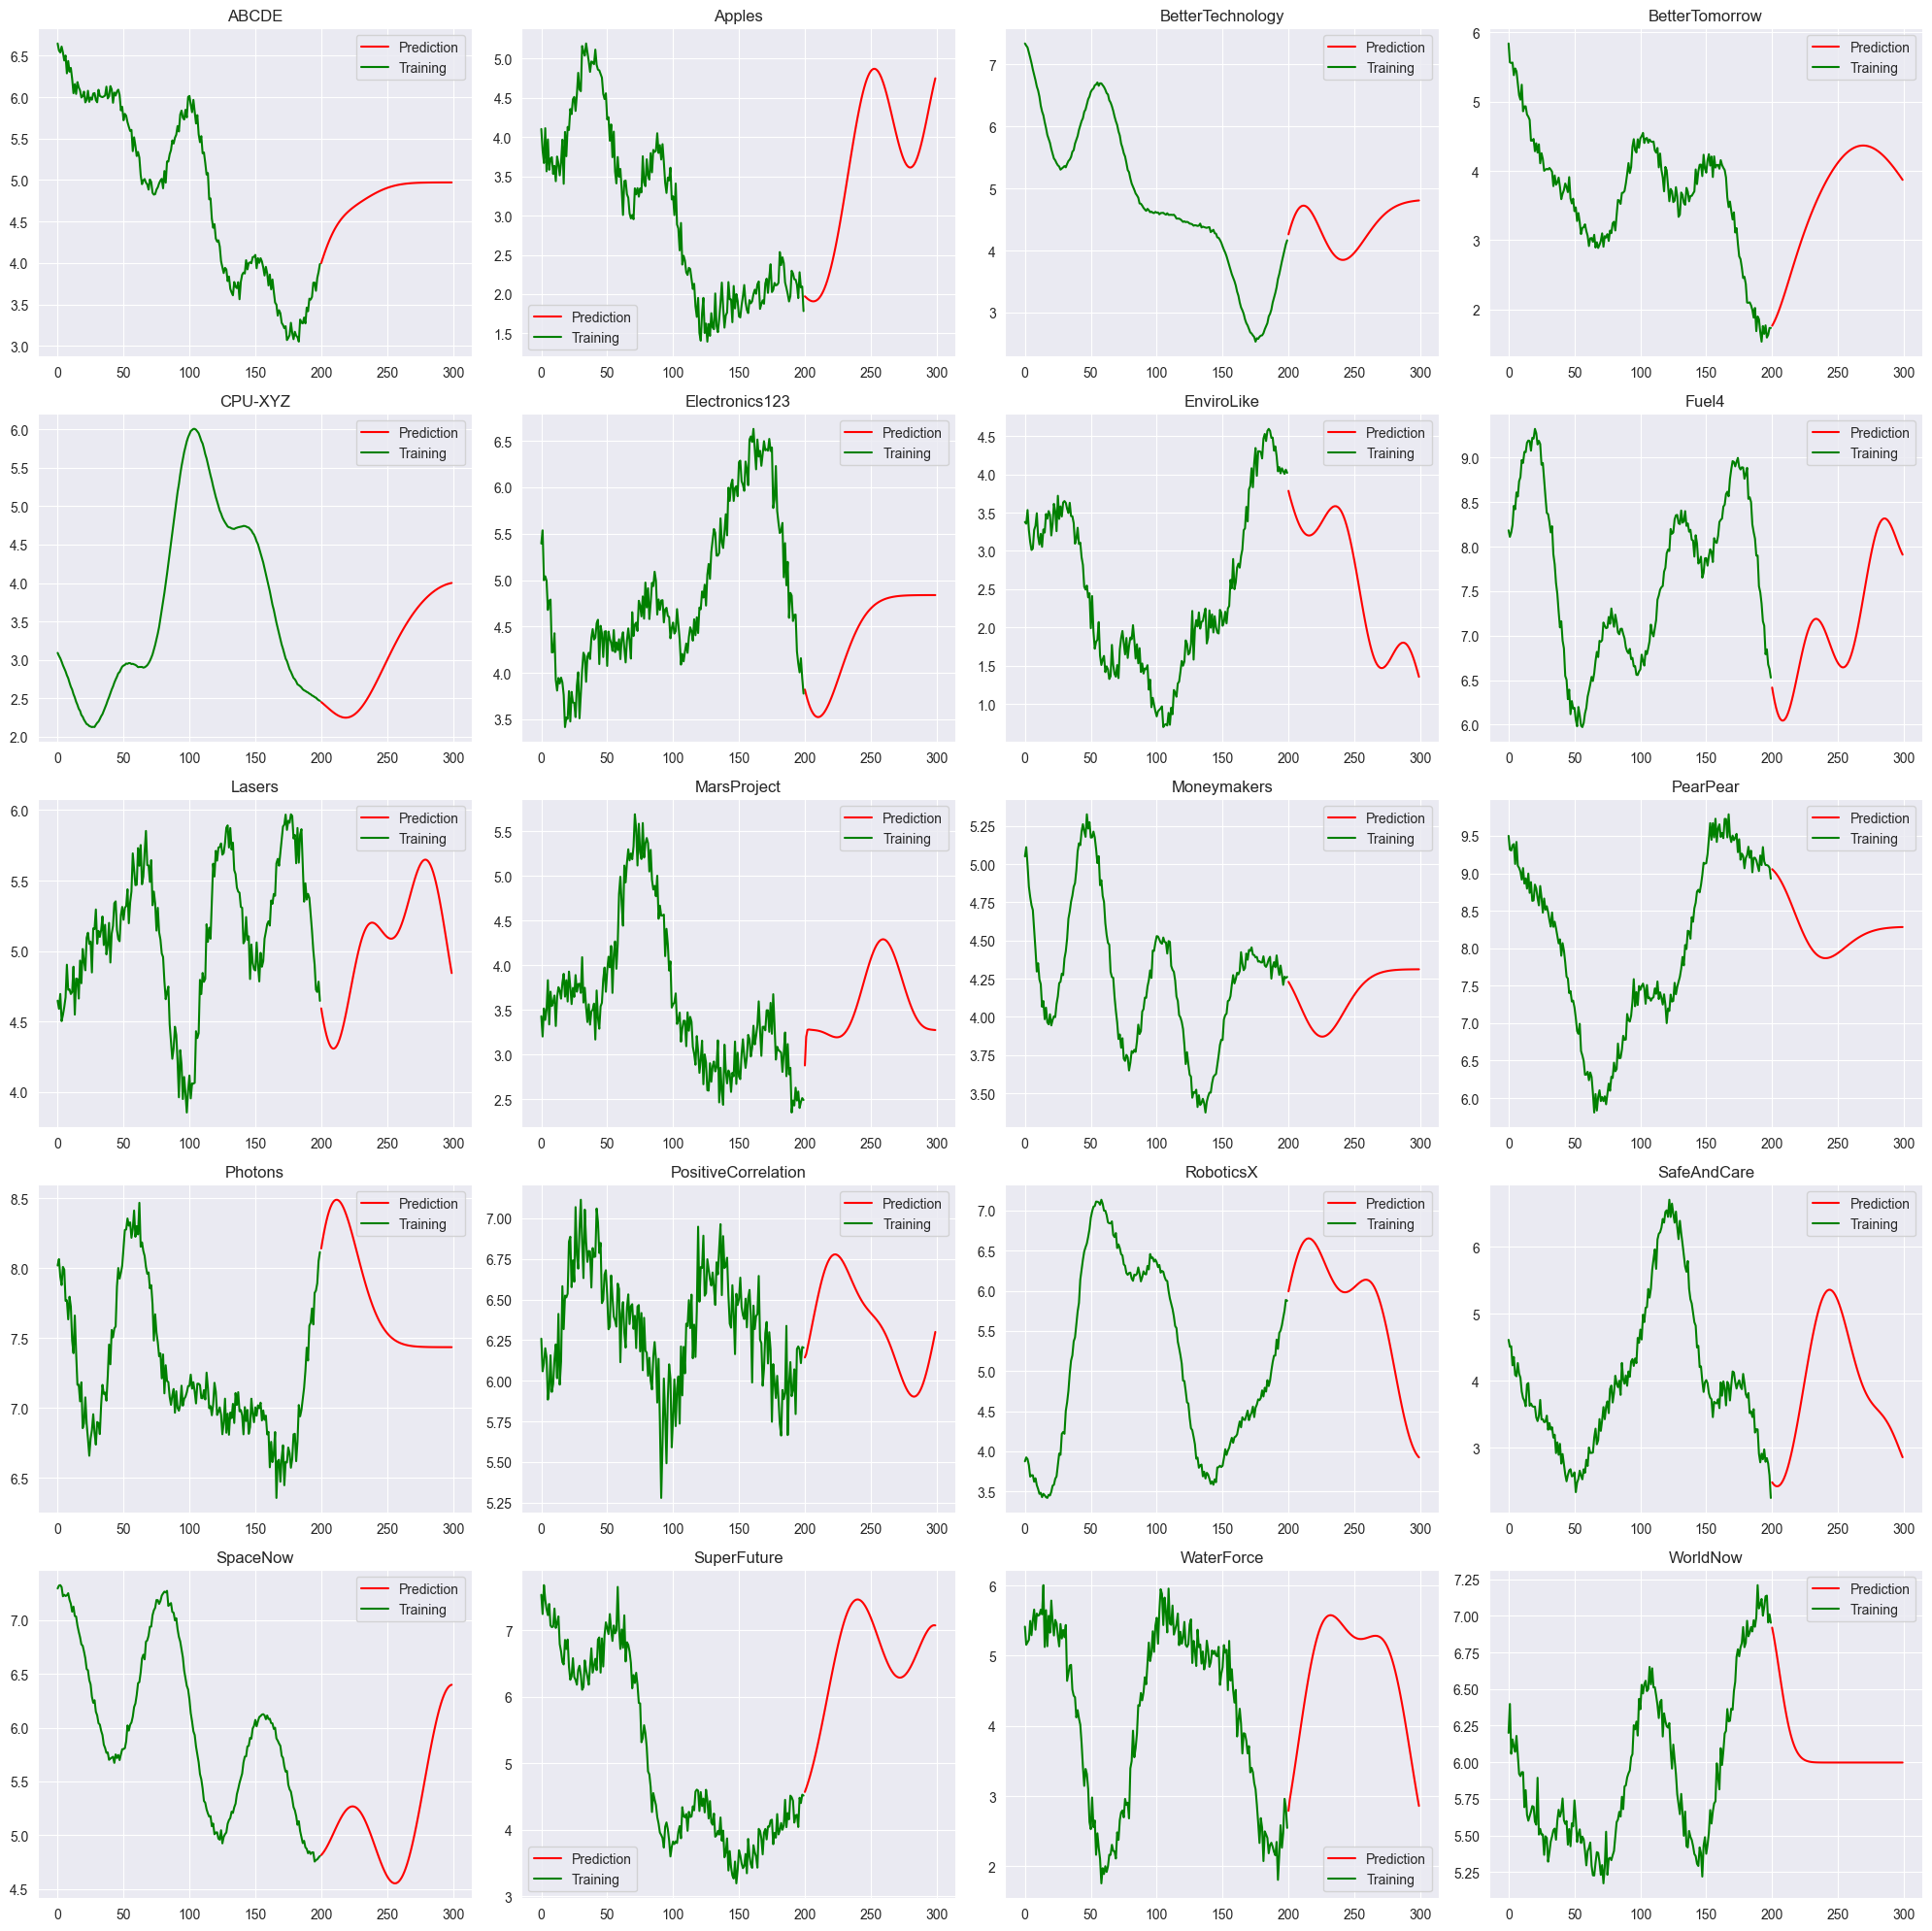

In [122]:
train_size = 301
prediction_size = 100


fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for i, company in enumerate(data.keys()):
    X_train = np.array([time for time, price in data[company][:train_size]])
    X_train = X_train.reshape(-1, 1)
    y_train = np.array([price for time, price in data[company][:train_size]])

    X_test = np.arange(train_size, train_size+prediction_size, 1)
    X_test = X_test.reshape(-1, 1)

    gp = GaussianProcessRegressor(kernel=kernel_[0])
    gp.fit(X_train, y_train)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    plot_gp(axs[i//4, i%4], X_test, y_pred, X_train, y_train, title=company)

plt.tight_layout()
plt.show()

In [8]:
from helpers.data_loader import load_data

data = load_data('../Bundle3')
print(list(data.keys()))
print(len(data['ABCDE']))

['ABCDE', 'Apples', 'BetterTechnology', 'BetterTomorrow', 'CPU-XYZ', 'Electronics123', 'EnviroLike', 'Fuel4', 'Lasers', 'MarsProject', 'Moneymakers', 'PearPear', 'Photons', 'PositiveCorrelation', 'RoboticsX', 'SafeAndCare', 'SpaceNow', 'SuperFuture', 'WaterForce', 'WorldNow']
301


In [31]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


class GaussianProcessFortuneTeller:
    def __init__(self):
        self.__asset_expected_returns = {}

        periodic_kernel = kernels.ConstantKernel(1.0) * kernels.ExpSineSquared(length_scale=0.1, periodicity=100.0)
        linear_kernel = kernels.ConstantKernel(1.0) * kernels.RBF(length_scale=1.0)
        white_kernel = kernels.WhiteKernel(noise_level=1e-6)

        self.__kernel = periodic_kernel + linear_kernel + white_kernel

    def make_prediction(self, times, prices):
        X = np.array(times).reshape(-1, 1)
        y = np.array(prices).reshape(-1, 1)

        model, params = self.get_tuned_model(X, y)

        X_pred = np.array(range(len(X), len(X) + 100)).reshape(-1, 1)
        y_pred, sigma = model.predict(X_pred, return_std=True)

        return y_pred

    def get_tuned_model(self, X, y):
        X = np.array(X).reshape(-1, 1)
        y = np.array(y).reshape(-1, 1)

        param_grid = {
            "kernel__k1__k1__k2__length_scale": np.logspace(-4, 2, 2),
            # "kernel__k1__k2__k2__length_scale": np.logspace(-4, 2, 5),
            # "kernel__k1__k1__k1__constant_value": np.arange(-2, 2, 5),
            # "kernel__k2__noise_level": np.logspace(-10, -5, 5)
        }

        model = GaussianProcessRegressor(kernel=self.__kernel, n_restarts_optimizer=10)
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
                                   scoring='neg_mean_squared_error')

        grid_search.fit(X, y)

        # for key, value in model.get_params().items():
        #     print(f'{key}: {value}')

        return (grid_search.best_estimator_, grid_search.best_params_)


In [207]:
# gpft = GaussianProcessFortuneTeller()
# model, params = gpft.get_tuned_model([time for time, price in data['ABCDE'][:]], [price for time, price in data['ABCDE'][:]])

alpha: 1e-10
copy_X_train: True
kernel__k1: 1**2 * ExpSineSquared(length_scale=1, periodicity=100) + 1**2 * RBF(length_scale=1)
kernel__k2: WhiteKernel(noise_level=1e-05)
kernel__k1__k1: 1**2 * ExpSineSquared(length_scale=1, periodicity=100)
kernel__k1__k2: 1**2 * RBF(length_scale=1)
kernel__k1__k1__k1: 1**2
kernel__k1__k1__k2: ExpSineSquared(length_scale=1, periodicity=100)
kernel__k1__k1__k1__constant_value: 1.0
kernel__k1__k1__k1__constant_value_bounds: (1e-05, 100000.0)
kernel__k1__k1__k2__length_scale: 1.0
kernel__k1__k1__k2__periodicity: 100.0
kernel__k1__k1__k2__length_scale_bounds: (1e-05, 100000.0)
kernel__k1__k1__k2__periodicity_bounds: (1e-05, 100000.0)
kernel__k1__k2__k1: 1**2
kernel__k1__k2__k2: RBF(length_scale=1)
kernel__k1__k2__k1__constant_value: 1.0
kernel__k1__k2__k1__constant_value_bounds: (1e-05, 100000.0)
kernel__k1__k2__k2__length_scale: 1.0
kernel__k1__k2__k2__length_scale_bounds: (1e-05, 100000.0)
kernel__k2__noise_level: 1e-05
kernel__k2__noise_level_bounds: (

C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [208]:
print(params)

{'kernel__k1__k1__k1__constant_value': 1}


In [209]:
y_pred = model.predict(np.array(range(len(data['ABCDE']), len(data['ABCDE']) + 100)).reshape(-1, 1))

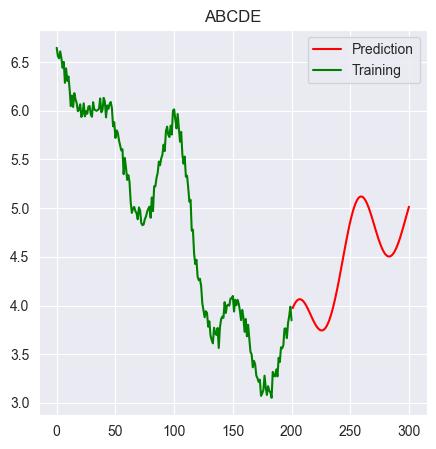

In [210]:
# x_train = [time for time, price in data['ABCDE'][:]]
# y_train = [price for time, price in data['ABCDE'][:]]
# x_test = range(len(x_train), len(x_train) + 100)
# # y_test = y_pred
# 
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# plot_gp(ax, x_test, y_pred, x_train, y_train, title='ABCDE')

In [211]:
# gpft = GaussianProcessFortuneTeller()
# y_pred2 = gpft.make_prediction([time for time, price in data['ABCDE'][:]], [price for time, price in data['ABCDE'][:]])


C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


alpha: 1e-10
copy_X_train: True
kernel__k1: 1**2 * ExpSineSquared(length_scale=1, periodicity=100) + 1**2 * RBF(length_scale=1)
kernel__k2: WhiteKernel(noise_level=1e-05)
kernel__k1__k1: 1**2 * ExpSineSquared(length_scale=1, periodicity=100)
kernel__k1__k2: 1**2 * RBF(length_scale=1)
kernel__k1__k1__k1: 1**2
kernel__k1__k1__k2: ExpSineSquared(length_scale=1, periodicity=100)
kernel__k1__k1__k1__constant_value: 1.0
kernel__k1__k1__k1__constant_value_bounds: (1e-05, 100000.0)
kernel__k1__k1__k2__length_scale: 1.0
kernel__k1__k1__k2__periodicity: 100.0
kernel__k1__k1__k2__length_scale_bounds: (1e-05, 100000.0)
kernel__k1__k1__k2__periodicity_bounds: (1e-05, 100000.0)
kernel__k1__k2__k1: 1**2
kernel__k1__k2__k2: RBF(length_scale=1)
kernel__k1__k2__k1__constant_value: 1.0
kernel__k1__k2__k1__constant_value_bounds: (1e-05, 100000.0)
kernel__k1__k2__k2__length_scale: 1.0
kernel__k1__k2__k2__length_scale_bounds: (1e-05, 100000.0)
kernel__k2__noise_level: 1e-05
kernel__k2__noise_level_bounds: (

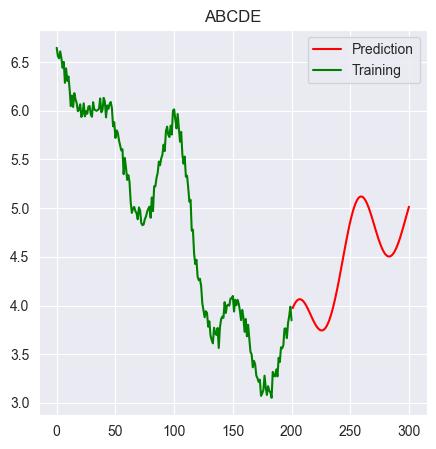

In [212]:
# x_train = [time for time, price in data['ABCDE'][:]]
# y_train = [price for time, price in data['ABCDE'][:]]
# x_test = range(len(x_train), len(x_train) + 100)
# # y_test = y_pred
# 
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# plot_gp(ax, x_test, y_pred2, x_train, y_train, title='ABCDE')

In [32]:
# import pandas as pd
# from tqdm import tqdm
# 
# predictions = pd.DataFrame(columns =['time'] + list(data.keys()))
# predictions['time'] = range(len(data['ABCDE']), len(data['ABCDE']) + 100)
# predictions.set_index('time', inplace=True)
# 
# fortune_teller = GaussianProcessFortuneTeller()
# for company in tqdm(list(data.keys())[1:2]):
#     y_pred = fortune_teller.make_prediction([time for time, price in data[company][:]], [price for time, price in data[company][:]])
#     predictions[company] = y_pred
# 
# predictions.to_csv('predictions.csv')

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
100%|██████████| 1/1 [01:15<00:00, 75.99s/it]


C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jedra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find

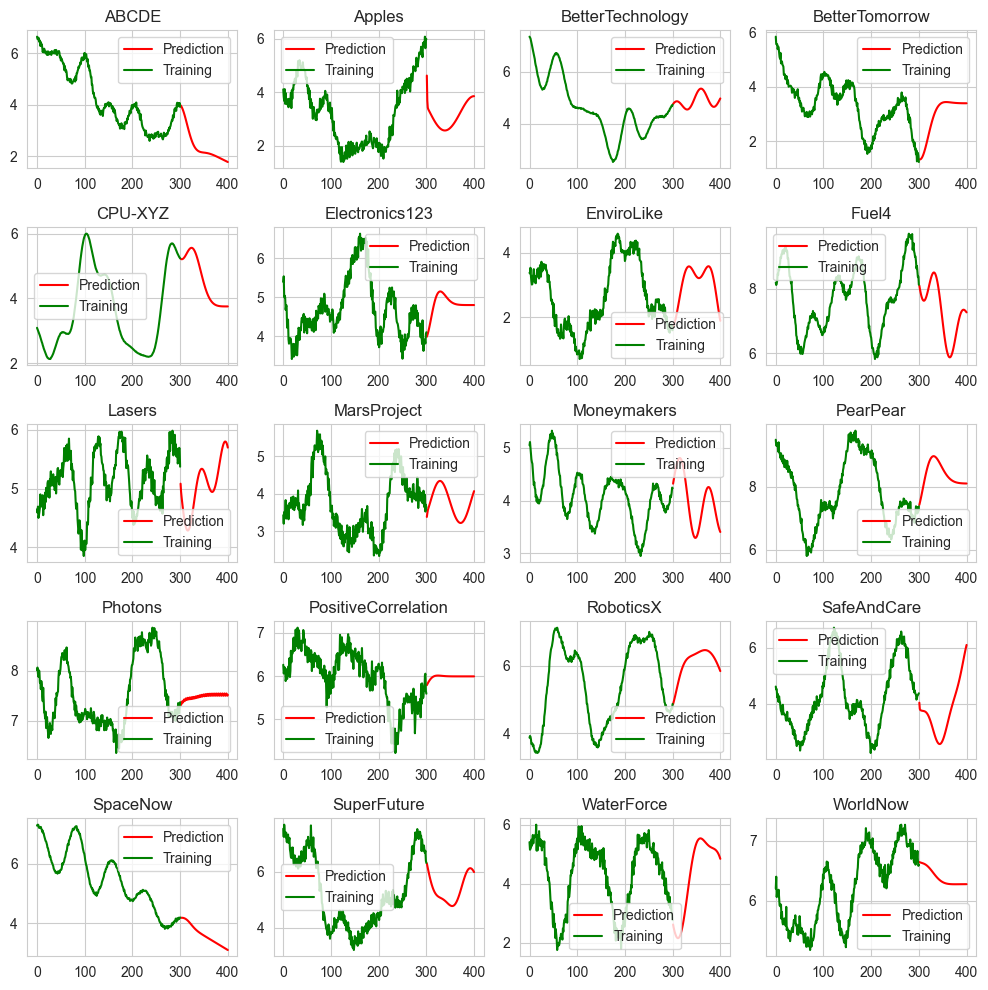

,ABCDE,Apples,BetterTechnology,BetterTomorrow,CPU-XYZ,Electronics123,EnviroLike,Fuel4,Lasers,MarsProject,Moneymakers,PearPear,Photons,PositiveCorrelation,RoboticsX,SafeAndCare,SpaceNow,SuperFuture,WaterForce,WorldNow
time,,,,,,,,,,,,,,,,,,,,
301,3.978012,4.618103,4.756150,1.337722,5.230487,3.987275,1.690769,8.090960,5.085099,3.384107,4.321139,7.430802,7.332684,5.788254,4.869544,4.037097,4.184909,6.297970,2.622486,6.642658
302,3.953428,3.684989,4.779658,1.332380,5.220792,4.023088,1.725933,8.002450,4.949568,3.476137,4.374711,7.493084,7.318235,5.810599,4.920624,3.814542,4.186918,6.213438,2.533795,6.639268
303,3.922347,3.422374,4.800529,1.334638,5.215738,4.064674,1.767906,7.921431,4.867083,3.559049,4.427726,7.558933,7.343637,5.831868,4.974938,3.776945,4.187859,6.129938,2.460633,6.636252
304,3.885095,3.362131,4.818503,1.344329,5.215290,4.111436,1.816362,7.848820,4.792041,3.603770,4.479546,7.627855,7.386299,5.851971,5.031937,3.766122,4.187736,6.047999,2.394566,6.633501
305,3.842058,3.326736,4.833372,1.361229,5.219312,4.162713,1.870906,7.785403,4.719906,3.644738,4.529540,7.699329,7.387393,5.870836,5.091069,3.758737,4.186533,5.968112,2.335872,6.630908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1.810754,3.836280,4.829993,3.395823,3.754054,4.799355,2.243466,7.329975,5.796422,3.913651,3.518236,8.111280,7.522126,5.991649,5.987174,5.777733,3.140505,6.086270,5.015159,6.272900
397,1.801539,3.842517,4.863894,3.395748,3.754005,4.799350,2.148234,7.316938,5.782926,3.955354,3.483996,8.110793,7.547460,5.991649,5.953197,5.861304,3.130789,6.066151,4.979936,6.272940
398,1.792334,3.846863,4.898730,3.395703,3.754011,4.799345,2.056440,7.300682,5.762248,3.996101,3.453483,8.110370,7.528617,5.991649,5.918391,5.942070,3.121074,6.042285,4.940340,6.272976


In [9]:
train_size = 301
prediction_size = 100

predictions = pd.DataFrame(columns =['time'] + list(data.keys()))
predictions['time'] = range(len(data['ABCDE']), len(data['ABCDE']) + 100)
predictions.set_index('time', inplace=True)

fig, axs = plt.subplots(5, 4, figsize=(10, 10))
for i, company in enumerate(data.keys()):
    X_train = np.array([time for time, price in data[company]])
    X_train = X_train.reshape(-1, 1)
    y_train = np.array([price for time, price in data[company]])

    X_test = np.arange(len(X_train), len(X_train)+prediction_size, 1)
    X_test = X_test.reshape(-1, 1)

    gp = GaussianProcessRegressor(kernel=kernel_[0])
    gp.fit(X_train, y_train)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    predictions[company] = y_pred
    plot_gp(axs[i//4, i%4], X_test, y_pred, X_train, y_train, title=company)

plt.tight_layout()
plt.show()
predictions

In [14]:
predictions.to_csv('predictions3.csv')

In [52]:
predictions_dict = {}
for company in predictions.columns:
    predictions_dict[company] = predictions[company].values

predictions_dict['ABCDE']

array([3.97316372, 4.00112762, 4.0241948 , 4.04216444, 4.05492561,
       4.06246127, 4.0648503 , 4.0622673 , 4.05498022, 4.04334567,
       4.02780219, 4.00886143, 3.98709773, 3.96313622, 3.9376399 ,
       3.91129605, 3.88480242, 3.85885361, 3.83412798, 3.81127553,
       3.79090699, 3.77358434, 3.75981307, 3.75003603, 3.74462912,
       3.74389865, 3.74808017, 3.75733874, 3.77177028, 3.79140391,
       3.81620476, 3.84607735, 3.88086895, 3.92037305, 3.96433264,
       4.01244314, 4.06435521, 4.11967723, 4.17797764, 4.23878732,
       4.30160201, 4.36588517, 4.43107133, 4.49657005, 4.56177087,
       4.6260491 , 4.68877265, 4.7493099 , 4.80703847, 4.86135487,
       4.91168462, 4.95749291, 4.99829515, 5.03366737, 5.06325589,
       5.08678606, 5.10406965, 5.11501058, 5.11960882, 5.11796207,
       5.11026532, 5.09680811, 5.07796947, 5.05421089, 5.02606718,
       4.99413588, 4.9590652 , 4.92154107, 4.88227369, 4.84198386,
       4.80138966, 4.76119378, 4.72207175, 4.68466158, 4.64955

In [11]:
pred = pd.read_csv('predictions3.csv')
pred.set_index('time', inplace=True)

In [12]:

hist_data = pd.DataFrame(columns = ['time'] + list(data.keys()))
hist_data['time'] = range(len(data['ABCDE']))
hist_data.set_index('time', inplace=True)
for company in data.keys():
    hist_data[company] = [price for time, price in data[company]]

hist_data

,ABCDE,Apples,BetterTechnology,BetterTomorrow,CPU-XYZ,Electronics123,EnviroLike,Fuel4,Lasers,MarsProject,Moneymakers,PearPear,Photons,PositiveCorrelation,RoboticsX,SafeAndCare,SpaceNow,SuperFuture,WaterForce,WorldNow
time,,,,,,,,,,,,,,,,,,,,
0,6.647035,4.103143,7.337769,5.841302,3.091848,5.393554,3.377813,8.183288,4.647981,3.430620,5.050458,9.499545,8.019327,6.259034,3.874410,4.611369,7.292479,7.535904,5.413611,6.200499
1,6.561146,3.831594,7.303199,5.568664,3.053188,5.536121,3.355703,8.109978,4.590303,3.203734,5.110898,9.315460,8.065229,6.058430,3.923613,4.506012,7.319768,7.246514,5.154877,6.397966
2,6.538981,3.670023,7.272120,5.559131,3.021505,4.998200,3.534356,8.158483,4.695361,3.517328,4.994074,9.304631,7.939588,6.107349,3.900971,4.514940,7.323569,7.680647,5.190395,6.057956
3,6.609726,4.113280,7.193588,5.565574,2.978870,5.040635,3.271758,8.243390,4.502970,3.389193,4.852720,9.375137,7.880027,6.200008,3.826563,4.230041,7.305704,7.462105,5.224798,6.155564
4,6.538590,3.564217,7.108428,5.383673,2.931007,4.992050,3.115475,8.457742,4.546557,3.501014,4.784731,9.389402,8.009585,6.142768,3.684535,4.354019,7.220265,7.319229,5.494345,6.107838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3.979525,5.715087,4.627863,1.260904,5.349215,3.913548,1.627710,8.696705,5.471630,3.644780,4.060187,7.221729,7.355916,5.654834,4.677663,4.196661,4.158540,6.724089,3.174609,6.718778
297,4.070707,6.069307,4.643503,1.401834,5.309581,3.906118,1.771778,8.514384,5.604261,3.977174,4.085988,7.157902,7.291767,6.020912,4.732615,4.294864,4.190129,6.666425,3.310528,6.828447
298,3.943342,5.638975,4.694514,1.572612,5.287466,3.812547,1.696851,8.351752,5.695266,3.527870,4.147812,7.359695,7.150634,6.053582,4.717130,4.306432,4.144454,6.748000,2.999526,6.670373


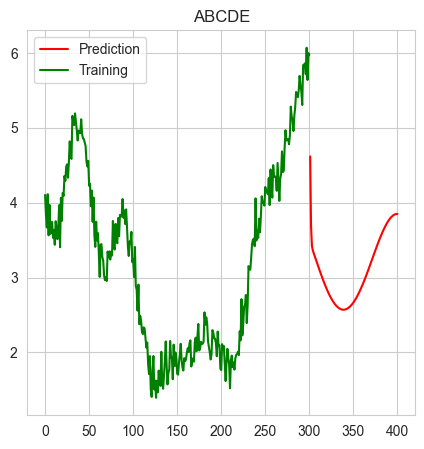

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_gp(ax, predictions.index.values, predictions['Apples'], hist_data.index.values, hist_data['Apples'], title='ABCDE')